# Stock Analysis, & building a trade strategy.

In [114]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

<a id='basics'></a>
## Python Basics For Finance: Pandas

In [115]:
import yfinance as yf
import datetime

# Define the start and end dates
start_date = datetime.datetime(2006, 10, 1)
end_date = datetime.datetime(2012, 1, 1)

# Download the data from Yahoo Finance
aapl = yf.download('AAPL', start=start_date, end=end_date)

# Display the first few rows
aapl.head()


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-10-02,2.682143,2.709643,2.653571,2.673571,2.257765,712639200
2006-10-03,2.658929,2.676786,2.613929,2.645714,2.234240,790708800
2006-10-04,2.646429,2.695000,2.612857,2.692143,2.273448,829082800
2006-10-05,2.661786,2.720000,2.647500,2.672500,2.256860,683883200
2006-10-06,2.657857,2.680000,2.636071,2.650714,2.238462,466958800


In [116]:
!pip install Quandl

In [117]:
import quandl 
aapl = quandl.get("WIKI/AAPL", start_date="2006-10-01", end_date="2012-01-01")
aapl.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2006-10-02,75.10,75.870,74.30,74.86,25451400.0,0.0,1.0,9.651397,9.750352,9.548586,9.620553,178159800.0
2006-10-03,74.45,74.950,73.19,74.07,28239600.0,0.0,1.0,9.567863,9.632120,9.405935,9.519027,197677200.0
2006-10-04,74.10,75.462,73.16,75.38,29610100.0,0.0,1.0,9.522883,9.697919,9.402080,9.687381,207270700.0
2006-10-05,74.53,76.160,74.13,74.83,24424400.0,0.0,1.0,9.578144,9.787621,9.526738,9.616698,170970800.0
2006-10-06,74.42,75.040,73.81,74.22,16677100.0,0.0,1.0,9.564007,9.643686,9.485614,9.538304,116739700.0


In [118]:
# Alternatively, you can load in a data set from Yahoo! Finance: 
aapl = pd.read_csv("https://s3.amazonaws.com/assets.datacamp.com/blog_assets/aapl.csv", header=0, index_col= 0, names=['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], parse_dates=True)

### Working With Time Series Data

In [119]:
# Inspect the index 
print(aapl.index)

# Inspect the columns
print(aapl.columns)

# Select only the last 10 observations of `Close`
ts = aapl['Close'][-10:]

# Check the type of `ts` 
type(ts)

DatetimeIndex(['2006-10-02', '2006-10-03', '2006-10-04', '2006-10-05',
               '2006-10-06', '2006-10-09', '2006-10-10', '2006-10-11',
               '2006-10-12', '2006-10-13',
               ...
               '2011-12-16', '2011-12-19', '2011-12-20', '2011-12-21',
               '2011-12-22', '2011-12-23', '2011-12-27', '2011-12-28',
               '2011-12-29', '2011-12-30'],
              dtype='datetime64[ns]', length=1323, freq=None)
Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], dtype='object')


pandas.core.series.Series

In [120]:
# Inspect the first rows of November-December 2006
print(aapl.loc[pd.Timestamp('2006-11-01'):pd.Timestamp('2006-12-31')].head())

# Inspect the first rows of 2007 
print(aapl.loc['2007'].head())

# Inspect November 2006
print(aapl.iloc[22:43])

# Inspect the 'Open' and 'Close' values at 2006-11-01 and 2006-12-01
print(aapl.iloc[[22,43], [0, 3]])

             Open   High    Low      Close       Volume  Adj Close
2006-11-01  81.10  81.38  78.36  79.160004  152798100.0  11.308572
2006-11-02  78.92  79.32  78.50  78.979996  116370800.0  11.282857
2006-11-03  79.36  79.53  77.79  78.290001  107972200.0  11.184286
2006-11-06  78.95  80.06  78.43  79.709999  108644200.0  11.387143
2006-11-07  80.45  81.00  80.13  80.510002  131483100.0  11.501429
             Open   High    Low      Close       Volume  Adj Close
2007-01-03  86.29  86.58  81.90  83.800003  309579900.0  11.971429
2007-01-04  84.05  85.95  83.82  85.659996  211815100.0  12.237143
2007-01-05  85.77  86.20  84.40  85.049995  208685400.0  12.150000
2007-01-08  85.96  86.53  85.28  85.470001  199276700.0  12.210000
2007-01-09  86.45  92.98  85.15  92.570000  837324600.0  13.224286
             Open   High    Low      Close       Volume  Adj Close
2006-11-01  81.10  81.38  78.36  79.160004  152798100.0  11.308572
2006-11-02  78.92  79.32  78.50  78.979996  116370800.0  11.28

In [121]:
# Sample 20 rows
sample = aapl.sample(20)

# Print `sample`
print(sample)

# Resample to monthly level 
monthly_aapl = aapl.resample('M')

# Print `monthly_aapl`
print(monthly_aapl)

              Open    High     Low       Close       Volume  Adj Close
2011-03-24  341.85  346.00  338.86  344.970001  101178000.0  49.281429
2011-06-03  343.18  345.33  342.01  343.440002   78312500.0  49.062859
2010-08-30  240.76  245.75  240.68  242.500000   95822300.0  34.642857
2008-06-12  181.49  182.60  171.20  173.259995  327083400.0  24.751429
2010-04-12  242.20  243.07  241.81  242.290009   83256600.0  34.612858
2009-06-08  143.82  144.23  139.43  143.849991  232913100.0  20.549999
2008-10-20   99.78  100.03   93.64   98.439995  387292500.0  14.062857
2009-10-22  204.70  207.85  202.51  205.199997  197848000.0  29.314285
2011-03-08  354.91  357.40  352.25  355.760010   89079200.0  50.822857
2009-05-01  125.80  127.95  125.80  127.240005   99379000.0  18.177143
2007-08-08  136.76  136.86  132.00  134.009995  202024200.0  19.144285
2007-11-30  187.34  187.70  179.70  182.220001  296950500.0  26.031429
2009-07-16  145.76  148.02  145.57  147.520004   98392700.0  21.074286
2011-1

/var/folders/00/6lqlmhsd6vbfdn311v6mn1yc0000gn/T/ipykernel_57841/2576300409.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_aapl = aapl.resample('M')


In [122]:
# Add a column `diff` to `aapl` 
aapl['diff'] = aapl.Open - aapl.Close

# Delete the new `diff` column
del aapl['diff']

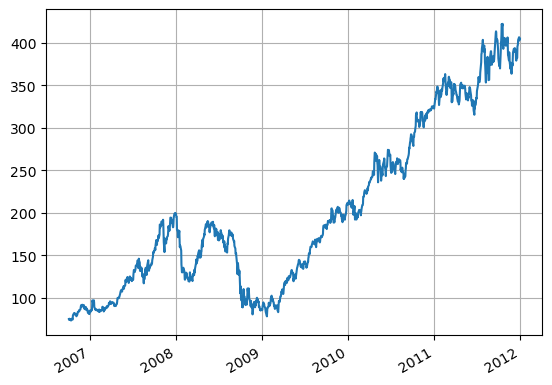

In [123]:
# Import Matplotlib's `pyplot` module as `plt`
import matplotlib.pyplot as plt

# Plot the closing prices for `aapl`
aapl['Close'].plot(grid=True)

# Show the plot
plt.show()

<a id='commonanalyses'></a>
## Common Financial Analysis

### Returns

In [124]:
# Assign `Adj Close` to `daily_close`
daily_close = aapl[['Adj Close']]

# Daily returns
daily_pct_c = daily_close.pct_change()

# Replace NA values with 0
daily_pct_c.fillna(0, inplace=True)

# Inspect daily returns
print(daily_pct_c)

# Daily log returns
daily_log_returns = np.log(daily_close.pct_change()+1)

# Print daily log returns
print(daily_log_returns)

            Adj Close
2006-10-02   0.000000
2006-10-03  -0.010419
2006-10-04   0.017549
2006-10-05  -0.007296
2006-10-06  -0.008152
...               ...
2011-12-23   0.011993
2011-12-27   0.007934
2011-12-28  -0.009569
2011-12-29   0.006159
2011-12-30  -0.000296

[1323 rows x 1 columns]
            Adj Close
2006-10-02        NaN
2006-10-03  -0.010474
2006-10-04   0.017396
2006-10-05  -0.007323
2006-10-06  -0.008185
...               ...
2011-12-23   0.011922
2011-12-27   0.007903
2011-12-28  -0.009615
2011-12-29   0.006140
2011-12-30  -0.000296

[1323 rows x 1 columns]


In [125]:
# Resample `aapl` to business months, take last observation as value 
monthly = aapl.resample('BM').apply(lambda x: x[-1])

# Calculate the monthly percentage change
monthly.pct_change()

# Resample `aapl` to quarters, take the mean as value per quarter
quarter = aapl.resample("4M").mean()

# Calculate the quarterly percentage change
quarter.pct_change()

/var/folders/00/6lqlmhsd6vbfdn311v6mn1yc0000gn/T/ipykernel_57841/129075703.py:2: FutureWarning: 'BM' is deprecated and will be removed in a future version, please use 'BME' instead.
  monthly = aapl.resample('BM').apply(lambda x: x[-1])
/var/folders/00/6lqlmhsd6vbfdn311v6mn1yc0000gn/T/ipykernel_57841/129075703.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  monthly = aapl.resample('BM').apply(lambda x: x[-1])
/var/folders/00/6lqlmhsd6vbfdn311v6mn1yc0000gn/T/ipykernel_57841/129075703.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  quarter = aapl.resample("4M").mean()


,Open,High,Low,Close,Volume,Adj Close
2006-10-31,NaN,NaN,NaN,NaN,NaN,NaN
2007-02-28,0.125777,0.126451,0.121460,0.122860,0.369611,0.122860
2007-06-30,0.196030,0.195413,0.198331,0.197735,-0.080296,0.197735
2007-10-31,0.400961,0.404613,0.392010,0.400796,0.306882,0.400796
2008-02-29,0.127066,0.130711,0.117746,0.120394,0.172293,0.120394
2008-06-30,-0.003550,-0.004290,0.005927,0.003673,-0.209762,0.003673
2008-10-31,-0.114267,-0.108879,-0.124618,-0.118803,0.133219,-0.118803
2009-02-28,-0.363639,-0.363388,-0.359305,-0.360865,-0.161601,-0.360865
2009-06-30,0.312134,0.304359,0.324702,0.316588,-0.386935,0.316588
2009-10-31,0.421239,0.411193,0.425117,0.415901,-0.158270,0.415901


In [126]:
# Daily returns
daily_pct_c = daily_close / daily_close.shift(1) - 1

# Print `daily_pct_c`
print(daily_pct_c)

            Adj Close
2006-10-02        NaN
2006-10-03  -0.010419
2006-10-04   0.017549
2006-10-05  -0.007296
2006-10-06  -0.008152
...               ...
2011-12-23   0.011993
2011-12-27   0.007934
2011-12-28  -0.009569
2011-12-29   0.006159
2011-12-30  -0.000296

[1323 rows x 1 columns]


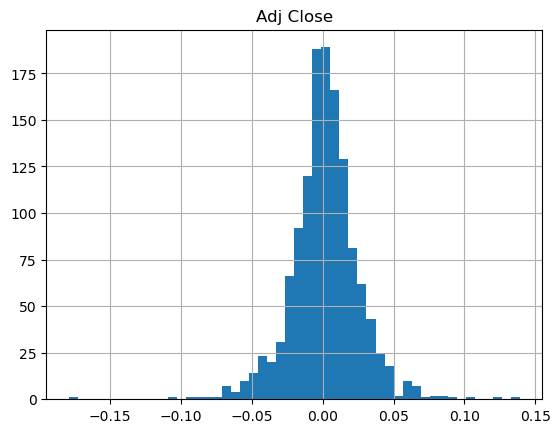

         Adj Close
count  1322.000000
mean      0.001566
std       0.023992
min      -0.179195
25%      -0.010672
50%       0.001677
75%       0.014306
max       0.139050


In [127]:
# Import matplotlib
import matplotlib.pyplot as plt

# Plot the distribution of `daily_pct_c`
daily_pct_c.hist(bins=50)

# Show the plot
plt.show()

# Pull up summary statistics
print(daily_pct_c.describe())

In [128]:
# Calculate the cumulative daily returns
cum_daily_return = (1 + daily_pct_c).cumprod()

# Print `cum_daily_return`
print(cum_daily_return)

            Adj Close
2006-10-02        NaN
2006-10-03   0.989581
2006-10-04   1.006946
2006-10-05   0.999599
2006-10-06   0.991451
...               ...
2011-12-23   5.387791
2011-12-27   5.430537
2011-12-28   5.378574
2011-12-29   5.411702
2011-12-30   5.410099

[1323 rows x 1 columns]


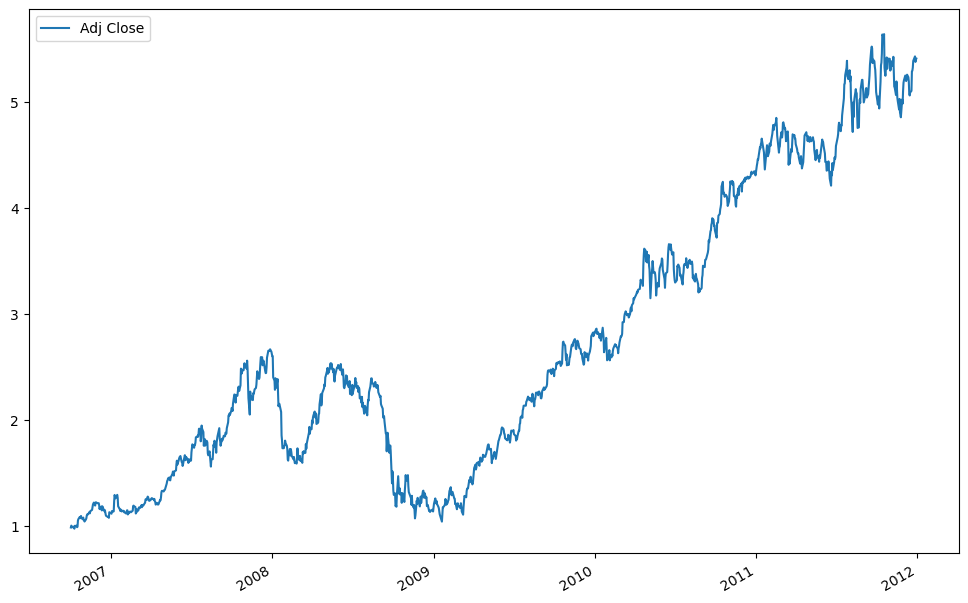

In [129]:
# Import matplotlib
import matplotlib.pyplot as plt 

# Plot the cumulative daily returns
cum_daily_return.plot(figsize=(12,8))

# Show the plot
plt.show()

In [130]:
# Resample the cumulative daily return to cumulative monthly return 
cum_monthly_return = cum_daily_return.resample("M").mean()

# Print the `cum_monthly_return`
print(cum_monthly_return)

            Adj Close
2006-10-31   1.031710
2006-11-30   1.140058
2006-12-31   1.155110
2007-01-31   1.187303
2007-02-28   1.145176
...               ...
2011-08-31   5.032897
2011-09-30   5.243032
2011-10-31   5.306305
2011-11-30   5.140466
2011-12-31   5.248871

[63 rows x 1 columns]


/var/folders/00/6lqlmhsd6vbfdn311v6mn1yc0000gn/T/ipykernel_57841/222305789.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  cum_monthly_return = cum_daily_return.resample("M").mean()


In [131]:
import yfinance as yf
import pandas as pd
import datetime

def get(tickers, startdate, enddate):
    def data(ticker):
        return yf.download(ticker, start=startdate, end=enddate)
    datas = map(data, tickers)
    return pd.concat(datas, keys=tickers, names=['Ticker', 'Date'])

tickers = ['AAPL', 'MSFT', 'IBM', 'GOOG']
all_data = get(tickers, datetime.datetime(2006, 10, 1), datetime.datetime(2012, 1, 1))
all_data.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Open      High       Low     Close  Adj Close  \
Ticker Date                                                            
AAPL   2006-10-02  2.682143  2.709643  2.653571  2.673571   2.257765   
       2006-10-03  2.658929  2.676786  2.613929  2.645714   2.234240   
       2006-10-04  2.646429  2.695000  2.612857  2.692143   2.273448   
       2006-10-05  2.661786  2.720000  2.647500  2.672500   2.256860   
       2006-10-06  2.657857  2.680000  2.636071  2.650714   2.238462   

                      Volume  
Ticker Date                   
AAPL   2006-10-02  712639200  
       2006-10-03  790708800  
       2006-10-04  829082800  
       2006-10-05  683883200  
       2006-10-06  466958800

In [132]:
#all_data = pd.read_csv("https://s3.amazonaws.com/assets.datacamp.com/blog_assets/all_stock_data.csv", index_col= [0,1], header=0, parse_dates=[1])

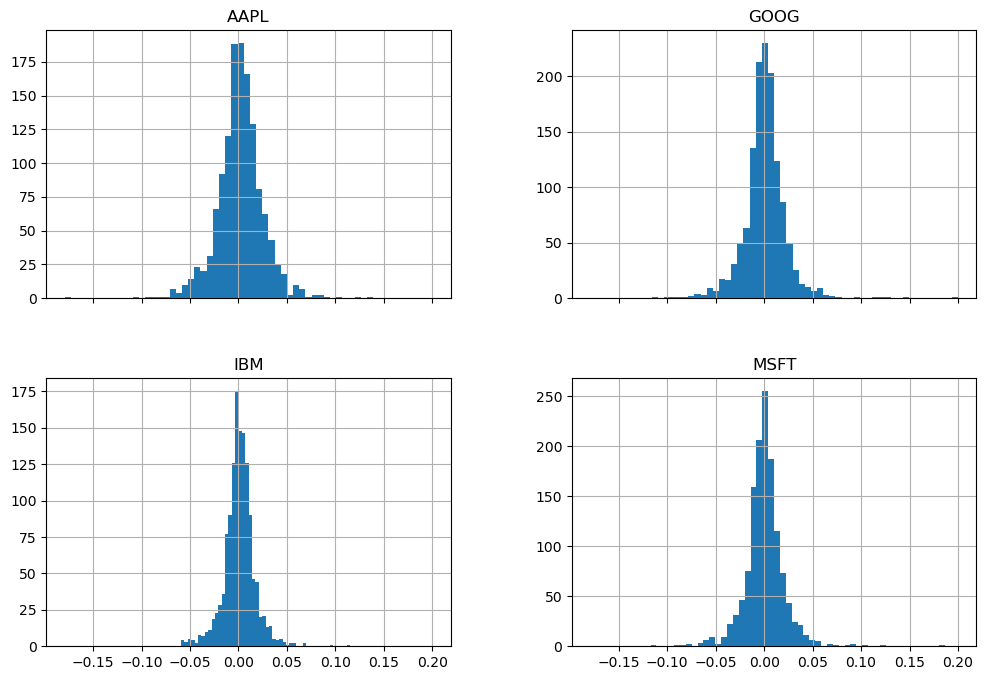

In [133]:
# Reshape the data to have tickers as columns and dates as the index
daily_close_px = all_data[['Adj Close']].reset_index().pivot(index='Date', columns='Ticker', values='Adj Close')

# Calculate the daily percentage change for the adjusted closing prices
daily_pct_change = daily_close_px.pct_change()

# Plot the distribution of daily percentage changes for each ticker
daily_pct_change.hist(bins=50, sharex=True, figsize=(12, 8))

# Show the resulting plot
plt.show()

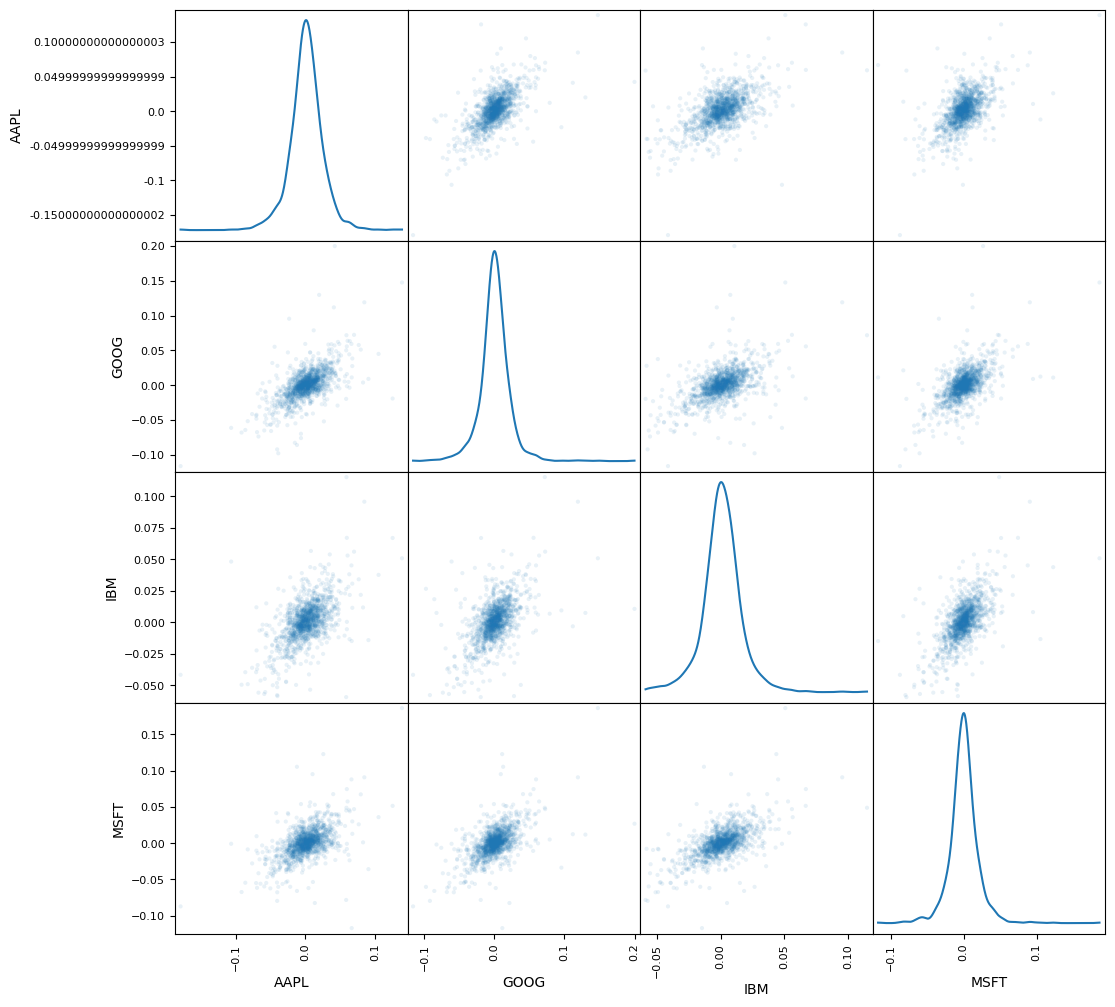

In [134]:
# Plot a scatter matrix with the `daily_pct_change` data 
pd.plotting.scatter_matrix(daily_pct_change, diagonal='kde', alpha=0.1,figsize=(12,12))

# Show the plot
plt.show()

### Moving Windows

In [135]:
# Isolate the adjusted closing prices 
adj_close_px = aapl['Adj Close']

# Calculate the moving average
moving_avg = adj_close_px.rolling(window=40).mean()

# Inspect the result
moving_avg[-10:]

2011-12-16    55.529679
2011-12-19    55.491607
2011-12-20    55.456536
2011-12-21    55.451821
2011-12-22    55.444500
2011-12-23    55.439643
2011-12-27    55.445286
2011-12-28    55.437643
2011-12-29    55.468393
2011-12-30    55.495500
Name: Adj Close, dtype: float64

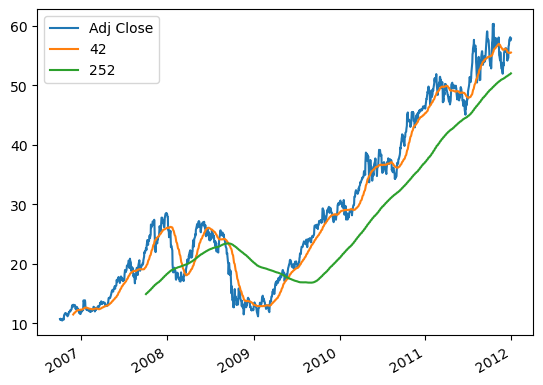

In [136]:
# Short moving window rolling mean
aapl['42'] = adj_close_px.rolling(window=40).mean()

# Long moving window rolling mean
aapl['252'] = adj_close_px.rolling(window=252).mean()

# Plot the adjusted closing price, the short and long windows of rolling means
aapl[['Adj Close', '42', '252']].plot()

plt.show()

### Volatility Calculation

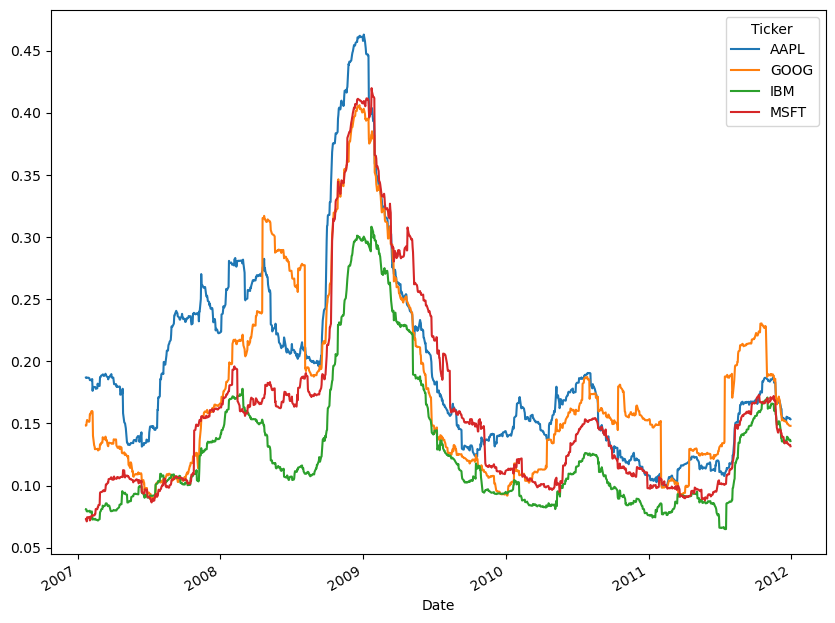

In [137]:
# Define the minumum of periods to consider 
min_periods = 75 

# Calculate the volatility
vol = daily_pct_change.rolling(min_periods).std() * np.sqrt(min_periods) 

# Plot the volatility
vol.plot(figsize=(10, 8))

# Show the plot
plt.show()

<a id='tradingstrategy'></a>
## Building A Trading Strategy With Python

In [138]:
# Initialize the short and long windows
short_window = 40
long_window = 100

# Initialize the `signals` DataFrame with the `signal` column
signals = pd.DataFrame(index=aapl.index)
signals['signal'] = 0.0

# Create short simple moving average over the short window
signals['short_mavg'] = aapl['Close'].rolling(window=short_window, min_periods=1, center=False).mean()

# Create long simple moving average over the long window
signals['long_mavg'] = aapl['Close'].rolling(window=long_window, min_periods=1, center=False).mean()

# Create signals
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] 
                                            > signals['long_mavg'][short_window:], 1.0, 0.0)   

# Generate trading orders
signals['positions'] = signals['signal'].diff()

/var/folders/00/6lqlmhsd6vbfdn311v6mn1yc0000gn/T/ipykernel_57841/3080775594.py:16: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:]


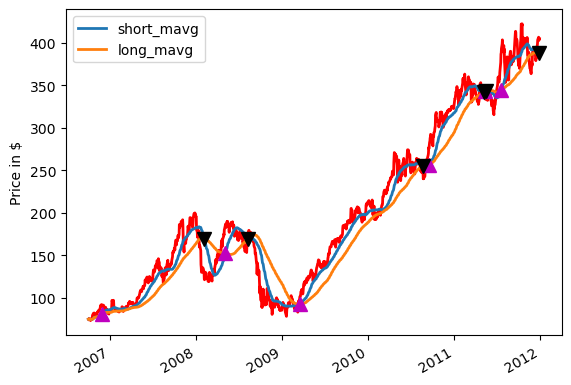

In [139]:
# Initialize the plot figure
fig = plt.figure()

# Add a subplot and label for y-axis
ax1 = fig.add_subplot(111,  ylabel='Price in $')

# Plot the closing price
aapl['Close'].plot(ax=ax1, color='r', lw=2.)

# Plot the short and long moving averages
signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)

# Plot the buy signals
ax1.plot(signals.loc[signals.positions == 1.0].index, 
         signals.short_mavg[signals.positions == 1.0],
         '^', markersize=10, color='m')
         
# Plot the sell signals
ax1.plot(signals.loc[signals.positions == -1.0].index, 
         signals.short_mavg[signals.positions == -1.0],
         'v', markersize=10, color='k')
         
# Show the plot
plt.show()

<a id='backtesting'></a>
## Backtesting A Strategy

### Implementation Of A Simple Backtester With Pandas

In [140]:
# Set the initial capital
initial_capital= float(100000.0)

# Create a DataFrame `positions`
positions = pd.DataFrame(index=signals.index).fillna(0.0)

# Buy a 100 shares
positions['AAPL'] = 100*signals['signal']   
  
# Initialize the portfolio with value owned   
portfolio = positions.multiply(aapl['Adj Close'], axis=0)

# Store the difference in shares owned 
pos_diff = positions.diff()

# Add `holdings` to portfolio
portfolio['holdings'] = (positions.multiply(aapl['Adj Close'], axis=0)).sum(axis=1)

# Add `cash` to portfolio
portfolio['cash'] = initial_capital - (pos_diff.multiply(aapl['Adj Close'], axis=0)).sum(axis=1).cumsum()   

# Add `total` to portfolio
portfolio['total'] = portfolio['cash'] + portfolio['holdings']

# Add `returns` to portfolio
portfolio['returns'] = portfolio['total'].pct_change()

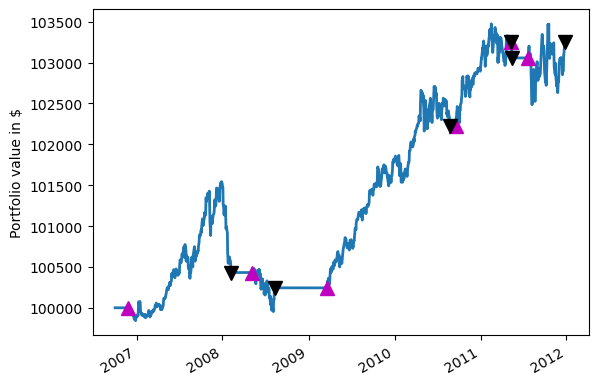

In [141]:
import matplotlib.pyplot as plt

fig = plt.figure()

ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')

# Plot the equity curve in dollars
portfolio['total'].plot(ax=ax1, lw=2.)

# Plot the "buy" trades against the equity curve
ax1.plot(portfolio.loc[signals.positions == 1.0].index, 
         portfolio.total[signals.positions == 1.0],
         '^', markersize=10, color='m')

# Plot the "sell" trades against the equity curve
ax1.plot(portfolio.loc[signals.positions == -1.0].index, 
         portfolio.total[signals.positions == -1.0],
         'v', markersize=10, color='k')

# Show the plot
plt.show()

<a id='evaluating'></a>
## Evaluating Moving Average Crossover Strategy 

### Sharpe Ratio

In [142]:
# Isolate the returns of your strategy
returns = portfolio['returns']

# annualized Sharpe ratio
sharpe_ratio = np.sqrt(252) * (returns.mean() / returns.std())

# Print the Sharpe ratio
print(sharpe_ratio)

0.7268769500133706


### Maximum Drawdown

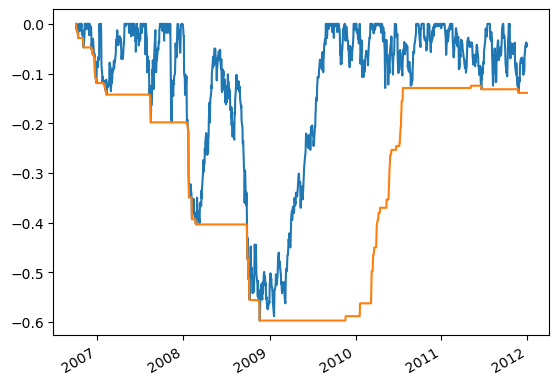

In [143]:
# Define a trailing 252 trading day window
window = 252

# Calculate the max drawdown in the past window days for each day
rolling_max = aapl['Adj Close'].rolling(window, min_periods=1).max()
daily_drawdown = aapl['Adj Close']/rolling_max - 1.0

# Calculate the minimum (negative) daily drawdown
max_daily_drawdown = daily_drawdown.rolling(window, min_periods=1).min()

# Plot the results
daily_drawdown.plot()
max_daily_drawdown.plot()

# Show the plot
plt.show()

### Compound Annual Growth Rate (CAGR)

In [144]:
# Get the number of days in `aapl`
days = (aapl.index[-1] - aapl.index[0]).days

# Calculate the CAGR 
cagr = ((((aapl['Adj Close'][-1]) / aapl['Adj Close'][1])) ** (365.0/days)) - 1

# Print CAGR
print(cagr)

0.3823445620598196


/var/folders/00/6lqlmhsd6vbfdn311v6mn1yc0000gn/T/ipykernel_57841/30074735.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cagr = ((((aapl['Adj Close'][-1]) / aapl['Adj Close'][1])) ** (365.0/days)) - 1
